Index(['epoch', 'lr', 'test_acc', 'test_avg_acc', 'test_loss', 'test_qk',
       'train_acc', 'train_avg_acc', 'train_loss', 'train_qk', 'val_acc',
       'val_avg_acc', 'val_loss', 'val_qk'],
      dtype='object')


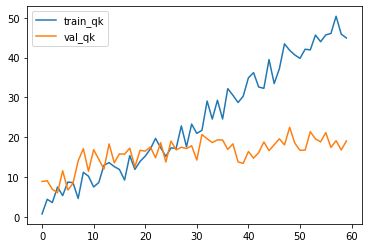

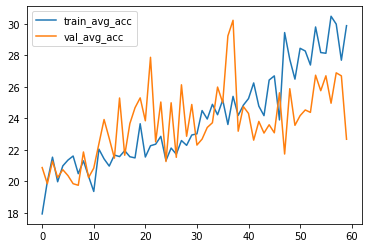

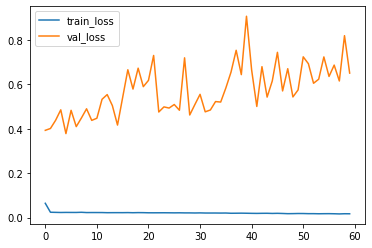

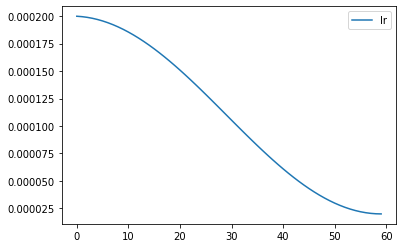

In [34]:
import os
import argparse
import numpy as np
from tqdm import tqdm
import pandas as pd
import joblib
from collections import OrderedDict

import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import torchvision.datasets as datasets

dirr2 = "./torch_models/dual_xception_higherlr_v00"
dirr2 = "torch_models/dual_xception_higherlr_v01"
dirr2 = "torch_models/small_dual_xception_v02"
dirr2 = "torch_models/new_small_dual_xception_400_v2b_v01"
dirr2 = "torch_models/new_small_dual_xception_400_v3a_v13/log.csv"
dirr2 = "torch_models/new_small_dual_xception_400_v3a_v14/log.csv"
dirr2 = "torch_models/new_small_dual_xception_400_v6mp/log.csv"
dirr2 = "torch_models/new_small_dual_xception_400_v7mp_v10/log.csv"
# dirr2 = "torch_models/new_small_dual_xception_400_v8mp_v01/log.csv"
dirr2 = "torch_models/new_small_dual_xception_400_v8mp_v04/log.csv"

# dirr2 = "torch_models/dual_xception_higherlr_v03"
# dirr2 = "/media/workstation/Storage/Test/Dual_AL/dual_al_test_v11"
# dirr2 = "/media/workstation/Storage/Test/Dual_AL/dual_al_test_v12/step_006"

# df = pd.read_csv(os.path.join(dirr2, "log.csv"))
df = pd.read_csv(dirr2)
print(df.columns)
df[["train_qk","val_qk"]].plot()
df[["train_avg_acc","val_avg_acc"]].plot()
df[["train_loss","val_loss"]].plot()
df[['lr']].plot()
good_lr = 0.0005
drop_to = 0.00005

In [25]:
df[["train_loss","val_loss"]].min(), df[["train_avg_acc","val_avg_acc"]].max(), df["val_loss"].argmin(), df["val_avg_acc"].argmax()

(train_loss    0.018455
 val_loss      0.321913
 dtype: float64,
 train_avg_acc    44.624493
 val_avg_acc      35.958556
 dtype: float64,
 26,
 64)

In [26]:
# from pytorch_adacos.mnist import archs
# from pytorch_adacos.metrics import AdaCos
# import torchvision.datasets as datasets
# import torchvision.transforms as transforms
# from torchvision import models
# from pytorch_adacos.model_helper import select_model

# model_type = "resnet18"
# model=select_model(model_type, {})

# PATH = f"./torch_models/{model_type}/model.pth"
# PATH2 = f"./torch_models/{model_type}/metric_fc.pth"

# metric_fc = AdaCos(num_features=1000, num_classes=7)

# model.load_state_dict(torch.load(PATH))
# metric_fc.load_state_dict(torch.load(PATH2))
# model.eval()
# metric_fc.eval()

# transform_test = transforms.Compose([
#         transforms.ToTensor(),
#     ])
# unseen_test_set = datasets.ImageFolder(root='./data3/test', transform=transform_test)
# unseen_test_loader = torch.utils.data.DataLoader(
#         unseen_test_set,
#         batch_size=16,
#         shuffle=False,
#         num_workers=8)

# y_true = []
# y_pred = []
# for i, (input, target) in tqdm(enumerate(unseen_test_loader), total=len(unseen_test_loader)):
#     feature = model(input)
#     output = metric_fc(feature, target)
#     y_pred += output.detach().numpy().argmax(axis = 1).tolist()
#     y_true += target.numpy().tolist()
# y_true = np.array(y_true)
# y_pred = np.array(y_pred)
# len(y_pred), len(y_true)

In [9]:
# from evaluate.metrics import *

# acc = accuracy(y_true, y_pred)
# avg = avg_acc(y_true, y_pred)
# cm = get_cm(y_true, y_pred)
# # get_dist(y_true, y_pred)
# print("Accuracy:", acc)
# print("Avg Accuracy:", avg)
# print(cm)


In [5]:
from PIL import Image
from active_learning.data_gen import open_image
import glob
import shutil

for i in range(5):
    x = glob.glob(f"../all_train_300/val/{i}/*.jpeg")
    y = glob.glob(f"../all_train/val/{i}/*.jpeg")
    shutil.copy2(x[0], f"../{i}_after.jpeg")
    shutil.copy2(y[0], f"../{i}_before.jpeg")



14

In [117]:
import glob
main_dir = "/media/workstation/Storage/Test/Dual_AL/dual_al_test_v17"
# main_dir = "/media/workstation/Storage/Test/Dual_AL/dual_al_test_v00"
files = glob.glob(f"{main_dir}/*")
n = len(files)-1
kappa = []
steps = []
metric = "kappa"
df2 = pd.read_csv(f"{step_dir}/result_2.csv")
df = pd.read_csv(f"{step_dir}/result.csv")

In [110]:
df["average_accuracy"].plot()
df["accuracy"].plot()
df["kappa"].plot()

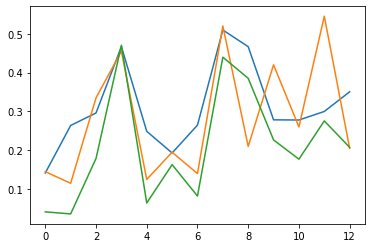

In [123]:
[j for j in df["cm"].values[3].split("\n")]

['          0         1         2         3         4',
 '0  0.493827  0.333333  0.104938  0.061728  0.006173',
 '1  0.500000  0.142857  0.071429  0.285714  0.000000',
 '2  0.333333  0.000000  0.333333  0.333333  0.000000',
 '3  0.000000  0.000000  0.000000  1.000000  0.000000',
 '4  0.000000  0.000000  0.090909  0.545455  0.363636']

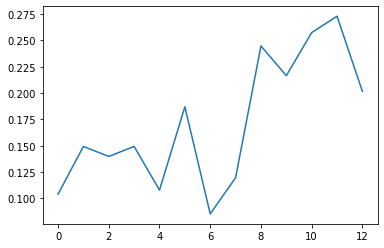